# Gráficos de esfuerzos y deformaciones

|Quién | Correo | Fecha | Qué hizo |
| ---  | ---    |---    | ---      |
| Luis Orlando Delgado Realpe | <ludelgador@unal.edu.co> | Septiembre 6, 2024 | Primer algoritmo |

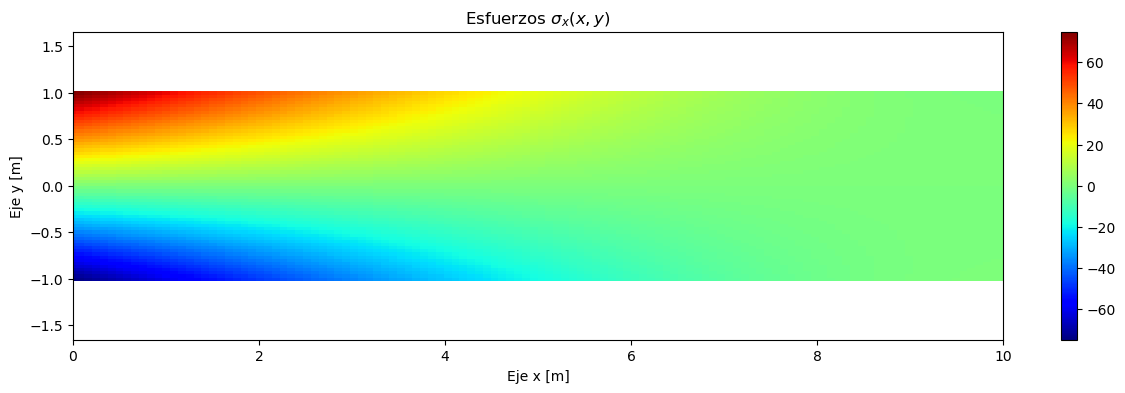

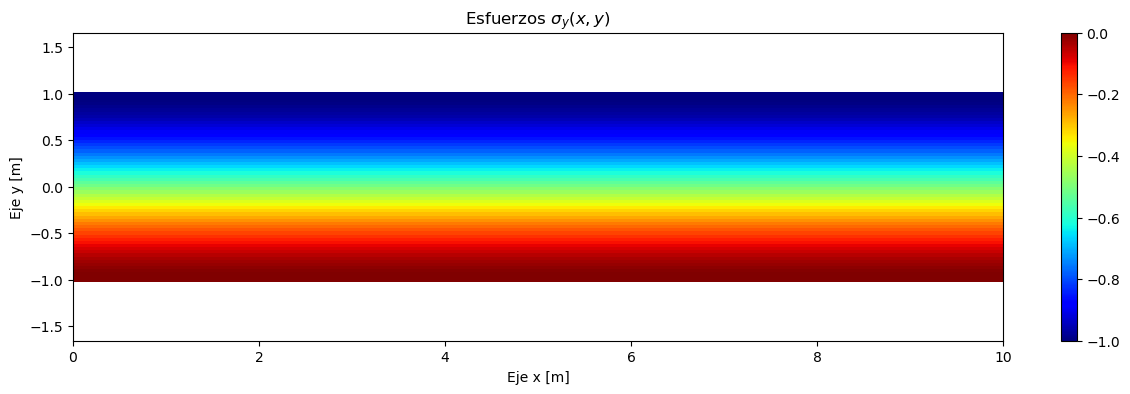

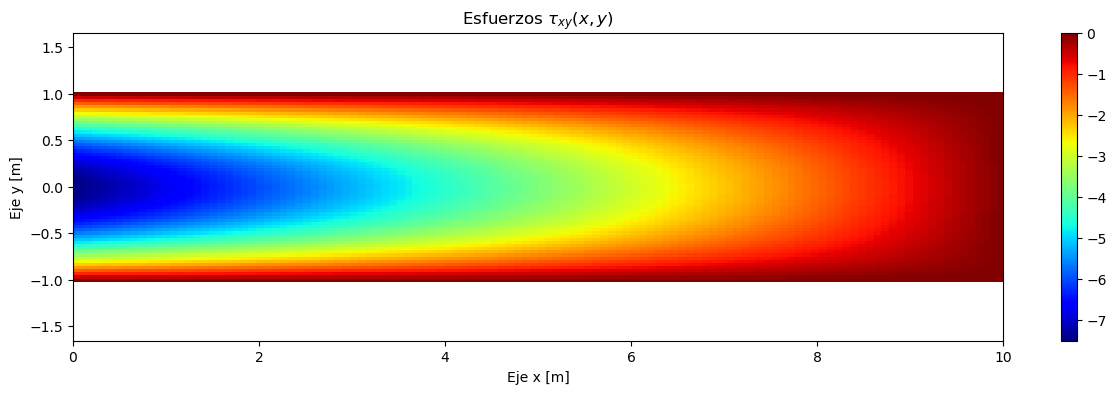

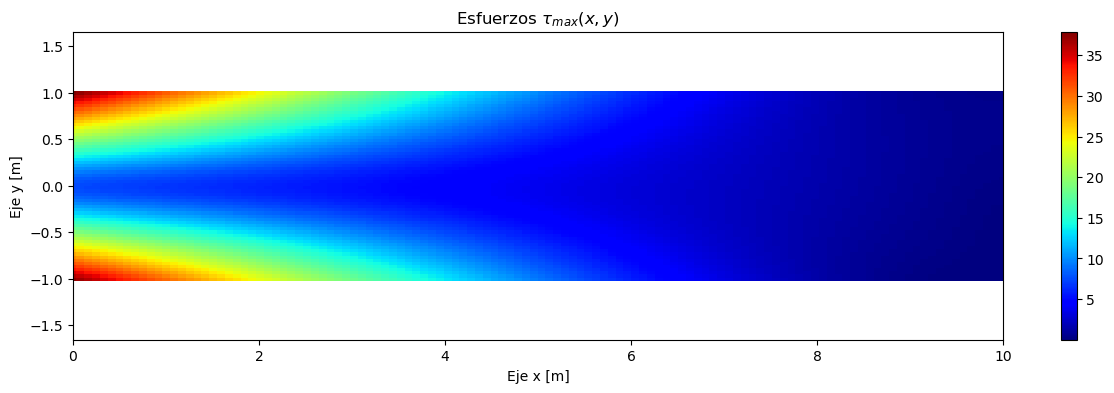

In [7]:
import numpy as np
import matplotlib.pyplot as plt

L = 10    # Longitud de la viga [m]
c = 1     # Altura de la viga   [m]
q = -1    # Cargas aplicadas    [kN/m]
t = 1     # Espesor de la viga  [m]

x1 = np.linspace(0,L,120)
y1 = np.linspace(-c,c,60)

x,y = np.meshgrid(x1,y1)

sx = (q*y*(10*y**2-15*x**2+30*L*x-6*c**2-15*L**2))/(20*c**3)   # Esfuerzo sx por Airy
sy = -(q*(y-2*c)*(y+c)**2)/(4*c**3)                            # Esfuerzo sy por Airy
txy = (3*q*(x-L)*(y-c)*(y+c))/(4*c**3)                         # Esfuerzo txy por Airy
tmax = np.hypot((sx - sy) / 2 , txy)                           # Esfuerzo txmax

def dibujar_esf(titulo, x, y, var):             # Función para gráficos de colores
    plt.figure(figsize=(15, 4))
    plt.pcolor(x, y, var, shading='auto', cmap='jet')
    plt.colorbar()
    plt.xlabel('Eje x [m]')
    plt.ylabel('Eje y [m]')
    plt.title(f'Esfuerzos {titulo}')
    plt.axis('equal')  # mantener ejes iguales
    plt.xlim(0, L)  # ajustar los límites del eje x
    plt.ylim(-c, c)  # ajustar los límites del eje y
    plt.show()


dibujar_esf(r"$\sigma_x(x,y)$",x1,y1,sx)      # Gráfico de colores sx
dibujar_esf(r"$\sigma_y(x,y)$",x1,y1,sy)      # Gráfico de colores sy
dibujar_esf(r"$\tau_{xy}(x,y)$",x1,y1,txy)    # Gráfico de colores txy
dibujar_esf(r"$\tau_{max}(x,y)$",x1,y1,tmax)  # Gráfico de colores txymax

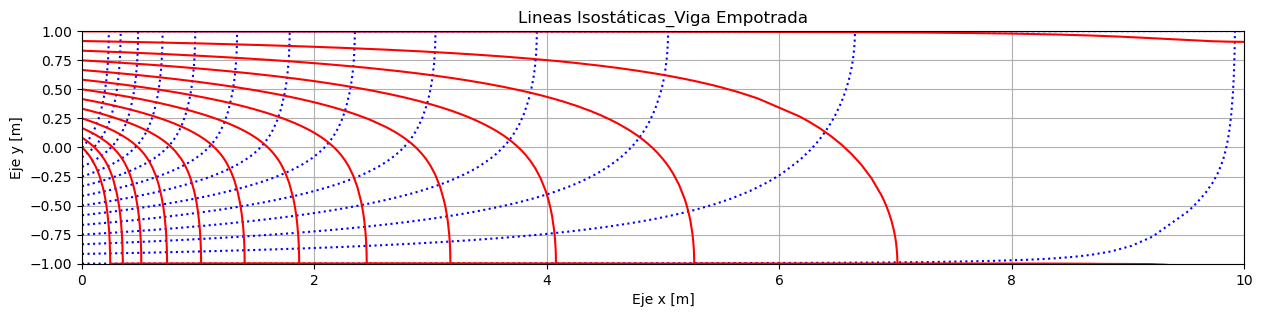

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

L = 10    # Longitud de la viga [m]
c = 1     # Altura de la viga   [m]
q = -1    # Cargas aplicadas    [kN/m]
t = 1     # Espesor de la viga  [m]

sx = lambda x,y : (q*y*(10*y**2-15*x**2+30*L*x-6*c**2-15*L**2))/(20*c**3)
sy = lambda x,y : -(q*(y-2*c)*(y+c)**2)/(4*c**3)
txy = lambda x,y : (3*q*(x-L)*(y-c)*(y+c))/(4*c**3)

dydxf1 = lambda x,y : -(sx(x,y) - sy(x,y))/(2*txy(x,y)) + np.hypot(1, (sx(x,y) - sy(x,y))/(2*txy(x,y)))
dydxf2 = lambda x,y : -(sx(x,y) - sy(x,y))/(2*txy(x,y)) - np.hypot(1, (sx(x,y) - sy(x,y))/(2*txy(x,y)))

# Se resuelven las Ec. diferenciales para toda la viga

xini, xfin = 0.001, L -0.001   # [x_inicial, x_final]
dominio = [xini, xfin]         # intervalo de solución de las Ec. diferenciales
yini1   = np.linspace(-(c-0.001),     -0.001, 13)
yini2   = np.linspace( 0.001,     +(c-0.001), 13)

# Solución de la Ec. diferencial por método LSODA
sol1 = solve_ivp(dydxf1, dominio, yini1, method='LSODA'); x1,y1 = sol1.t,sol1.y.T
sol2 = solve_ivp(dydxf2, dominio, yini2, method='LSODA'); x2,y2 = sol2.t,sol2.y.T

def grafico_isos (titulo, x1, y1,x2,y2):      # Función para gráficar lineas isostáticas
  plt.figure(figsize=(15,4))
  plt.title(titulo)
  plt.plot(x1,y1,"b:")
  plt.plot(x2,y2,"r-")
  plt.axis([0,L,-c,c])
  plt.xlabel("Eje x [m]")
  plt.ylabel("Eje y [m]")
  plt.gca().set_aspect('equal', adjustable='box')
  plt.grid()
  plt.show()

grafico_isos("Lineas Isostáticas_Viga Empotrada",x1,y1,x2,y2)